<a href="https://colab.research.google.com/github/Tanishasharma11/Bharat-Intern-Data-Science-Tasks/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 2. Loading the data into the data frame.

Data Collection/loading and processing.

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

In [2]:
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q




---



## 3. Checking the types of data

In [4]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64




---



In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## 4. Dropping the missing or null values.

In [8]:
#remove missing/null values
titanic_data = df.drop(columns='Cabin', axis=1)

In [9]:
#replacing missing values with mean number
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [11]:
#lets fix embarked
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [12]:
print(titanic_data['Embarked'].mode()[0])

S


In [13]:
#replace the mode value with the missing value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# 5. Analysing the data

In [14]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
#how many survived?
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [16]:
#visualizing data
sns.set()

<Axes: ylabel='count'>

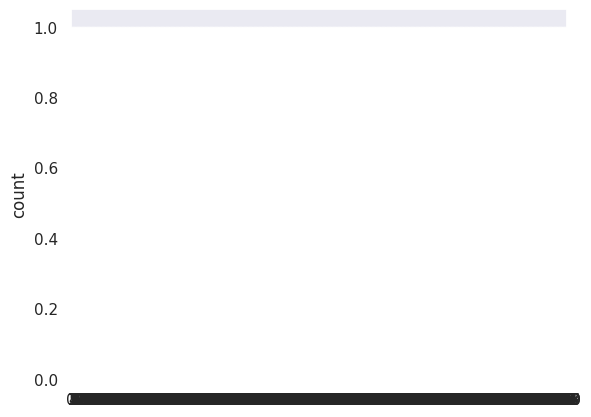

In [17]:

sns.countplot(titanic_data['Survived'])

In [18]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='count', ylabel='Sex'>

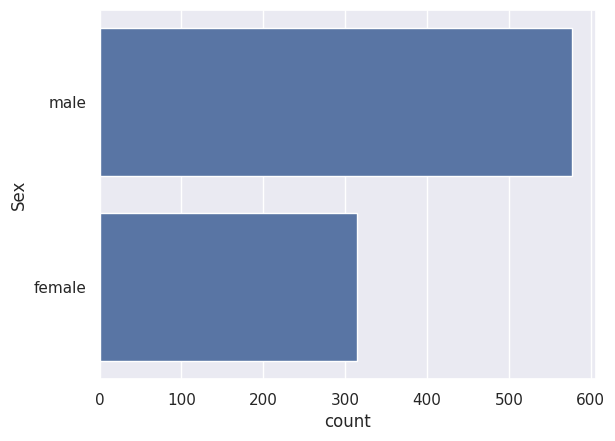

In [19]:
# count plot for "Sex" column
sns.countplot(titanic_data['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

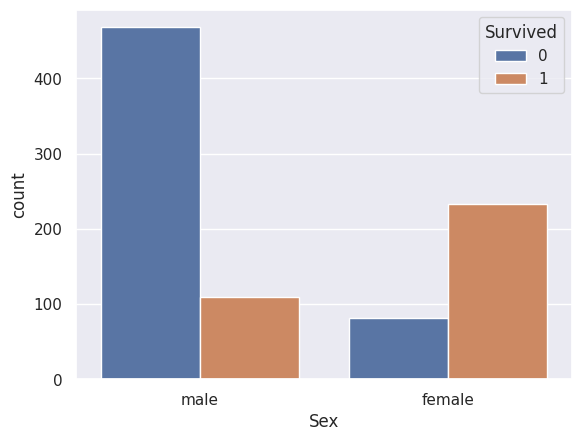

In [20]:
# Analysing Gender wise survivors
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

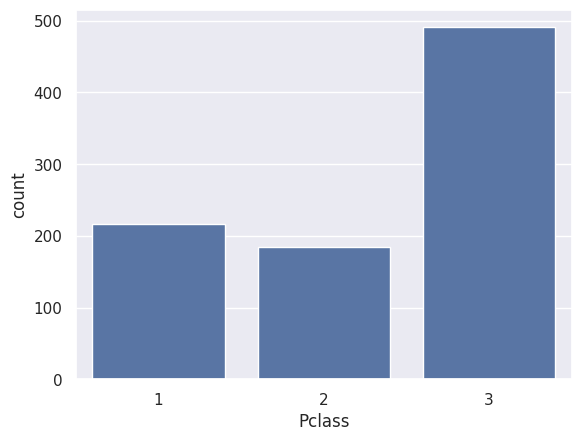

In [21]:
# count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

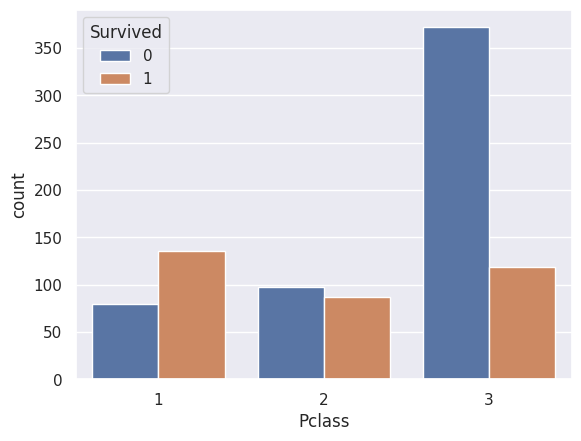

In [22]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

# 6. Encoding categorical columns

In [23]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [24]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [25]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [26]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [27]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [28]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64




---



# 7. Detecting Outliers

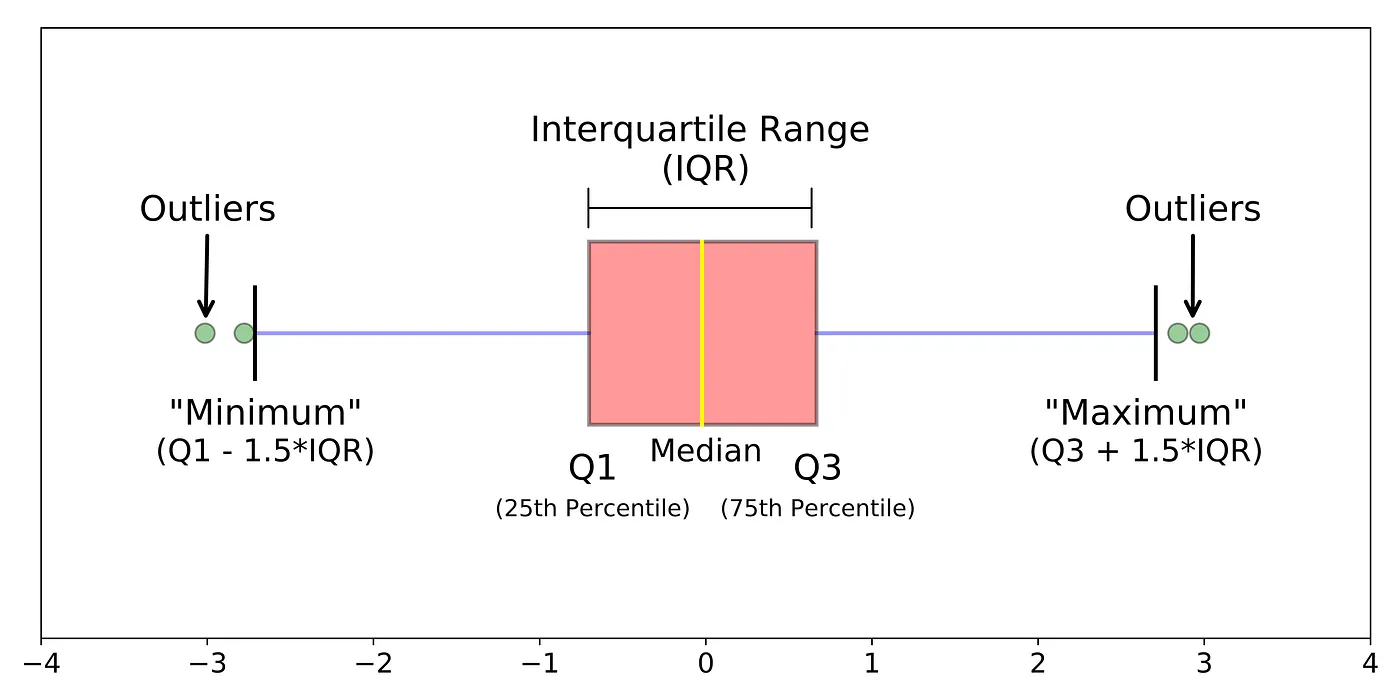

<Axes: xlabel='Age'>

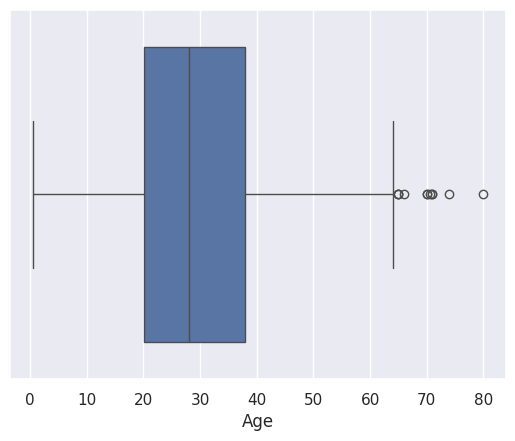

In [29]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='Fare'>

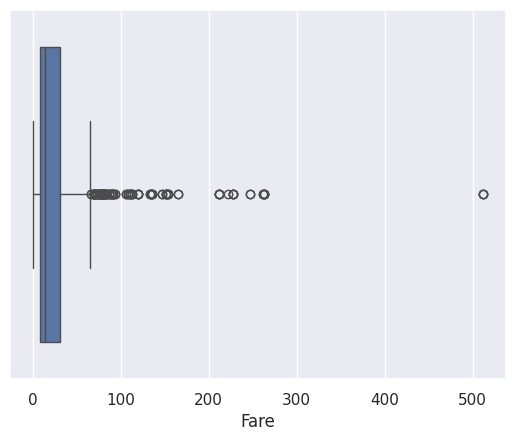

In [30]:
sns.boxplot(x=df['Fare'])

# 8. Split the data into test data and train data

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


# 9. Model training

In [34]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [36]:
#use the train data on model
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# 10. Testing the model

In [37]:
X_train_prediction = model.predict(X_train)

In [38]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 

In [39]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.973314606741573


In [40]:
#check accuracy of test data
X_test_prediction = model.predict(X_test)

In [41]:
print(X_test_prediction)

[1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0
 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1]


In [42]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.7988826815642458


# 11. Save the model

In [43]:
# saving model
import joblib
joblib.dump(model, 'xgboost_model.pkl')

['xgboost_model.pkl']